import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

View the first dataset

In [68]:
df_april = pd.read_excel(r'C:\Users\sweek\OneDrive - Lambton College\Projects Main\Data Analysis with Python\Sales analysis real world type\Sales_Data\Sales_April_2019.xlsx')
df_april

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


Combine all the datasets

In [69]:
files = [file for file in os.listdir('C:\\Users\\sweek\\OneDrive - Lambton College\\Projects Main\\Data Analysis with Python\\Sales analysis real world type\\Sales_Data')]
print(files)

all_data = pd.DataFrame()

for file in files:
    df = pd.read_excel(r'C:\Users\sweek\OneDrive - Lambton College\Projects Main\Data Analysis with Python\Sales analysis real world type\Sales_Data\\' + file)
    all_data = pd.concat([all_data, df])

['Sales_April_2019.xlsx', 'Sales_August_2019.xlsx', 'Sales_December_2019.xlsx', 'Sales_February_2019.xlsx', 'Sales_January_2019.xlsx', 'Sales_July_2019.xlsx', 'Sales_June_2019.xlsx', 'Sales_March_2019.xlsx', 'Sales_May_2019.xlsx', 'Sales_November_2019.xlsx', 'Sales_October_2019.xlsx', 'Sales_September_2019.xlsx']


In [70]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [71]:
# Now export to csv
all_data.to_excel('all_data.xlsx', index=False)

Read the new combined data and extract it's features

In [148]:
df = pd.read_excel(r'C:\Users\sweek\OneDrive - Lambton College\Projects Main\Data Analysis with Python\Sales analysis real world type\all_data.xlsx')

In [149]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [150]:
df.shape

(186850, 6)

In [151]:
df.describe()

,Order ID,Quantity Ordered,Price Each
count,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735
std,51512.737110,0.442793,332.731330
min,141234.000000,1.000000,2.990000
25%,185831.250000,1.000000,11.950000
50%,230367.500000,1.000000,14.950000
75%,275035.750000,1.000000,150.000000
max,319670.000000,9.000000,1700.000000


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  float64
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(3), object(3)
memory usage: 8.6+ MB


In [153]:
df.isna().sum()

Order ID            900
Product             900
Quantity Ordered    900
Price Each          900
Order Date          900
Purchase Address    900
dtype: int64

In [154]:
df =df.dropna(how='all')

In [155]:
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562.0,USB-C Charging Cable,1.0,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563.0,Bose SoundSport Headphones,1.0,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564.0,USB-C Charging Cable,1.0,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565.0,Macbook Pro Laptop,1.0,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
10,176566.0,Wired Headphones,1.0,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


In [156]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354.0,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355.0,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [157]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

C:\Users\sweek\AppData\Local\Temp\ipykernel_7600\3072535395.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [158]:
df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
186846,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


In [159]:
# Create a new "Month" column with the month names
df['Month'] = df['Order Date'].dt.strftime('%b')

In [160]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr
...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Sep
186846,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",Sep
186847,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",Sep
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",Sep


In [161]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

Task 1: What was the best month for sales? How much was earned in that month?

In [162]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr
...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Sep
186846,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",Sep
186847,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",Sep
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",Sep


In [163]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [164]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,23.90
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,99.99
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,11.99
...,...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Sep,8.97
186846,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",Sep,700.00
186847,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",Sep,700.00
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",Sep,379.99


In [165]:
sales_by_month = df.groupby('Month')['Sales'].sum()
sales_by_month

Month
Apr    3390670.24
Aug    2244467.88
Dec    4613443.34
Feb    2202022.42
Jan    1822256.73
Jul    2647775.76
Jun    2577802.26
Mar    2807100.38
May    3152606.75
Nov    3199603.20
Oct    3736726.88
Sep    2097560.13
Name: Sales, dtype: float64

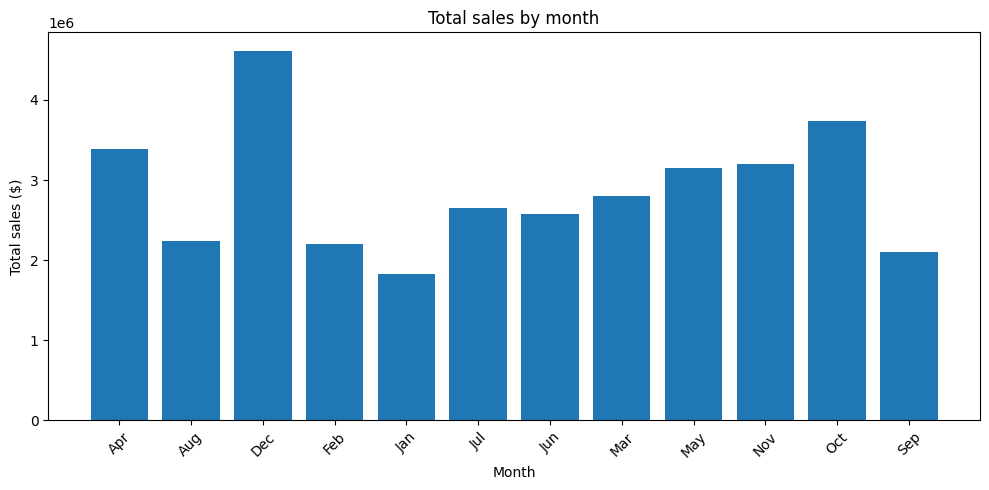

In [166]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(sales_by_month.index, sales_by_month.values)
ax.set_xlabel('Month')
ax.set_ylabel('Total sales ($)')
ax.set_title('Total sales by month')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


What city had the most sales?

In [167]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,23.90
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,99.99
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,11.99
...,...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Sep,8.97
186846,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",Sep,700.00
186847,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",Sep,700.00
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",Sep,379.99


In [168]:
df['city'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Sep,8.97,Los Angeles
186846,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",Sep,700.00,San Francisco
186847,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",Sep,700.00,San Francisco
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",Sep,379.99,San Francisco


In [169]:
sales_by_city = df.groupby('city')['Sales'].sum().sort_values(ascending=False)
sales_by_city

city
 San Francisco    8262203.91
 Los Angeles      5452570.80
 New York City    4664317.43
 Boston           3661642.01
 Atlanta          2795498.58
 Dallas           2767975.40
 Seattle          2747755.48
 Portland         2320490.61
 Austin           1819581.75
Name: Sales, dtype: float64

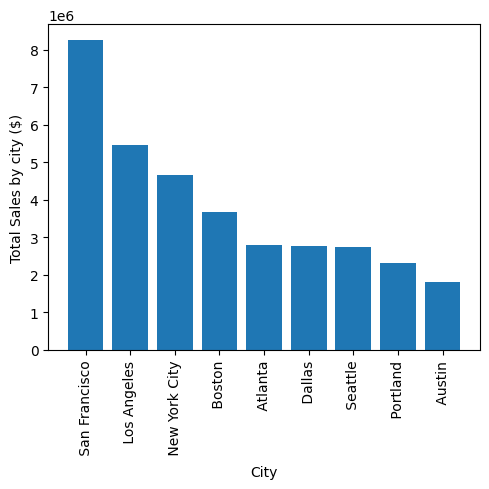

In [170]:
plt.subplots(figsize=(5,5))
plt.bar(sales_by_city.index, sales_by_city.values)
plt.xlabel('City')
plt.ylabel('Total Sales by city ($)')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


What city sold the most products?

In [171]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Sep,8.97,Los Angeles
186846,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",Sep,700.00,San Francisco
186847,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",Sep,700.00,San Francisco
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",Sep,379.99,San Francisco


In [172]:
df_temp = df.groupby('city')['Product'].value_counts()
df_temp

city      Product                 
 Atlanta  USB-C Charging Cable        1773
          Lightning Charging Cable    1754
          AA Batteries (4-pack)       1661
          AAA Batteries (4-pack)      1598
          Wired Headphones            1445
                                      ... 
 Seattle  ThinkPad Laptop              333
          20in Monitor                 322
          Vareebadd Phone              179
          LG Washing Machine            58
          LG Dryer                      56
Name: count, Length: 171, dtype: int64

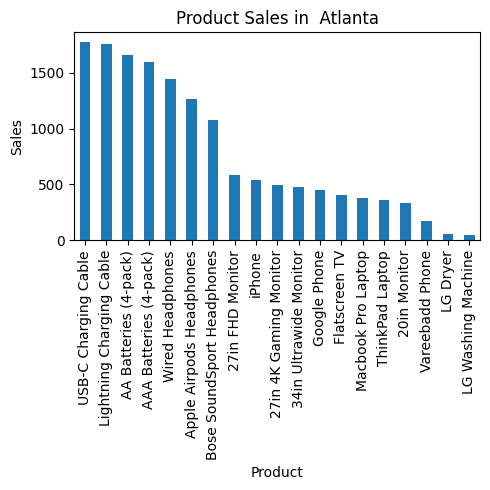

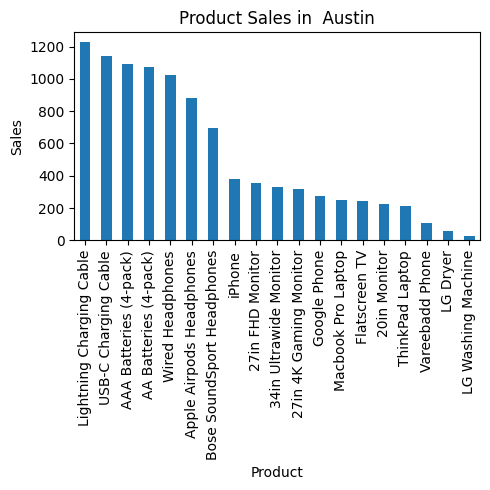

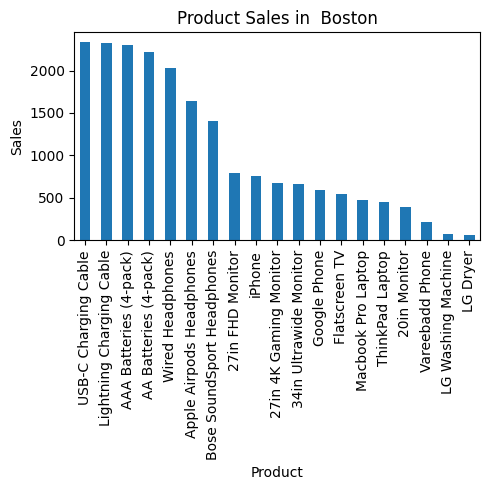

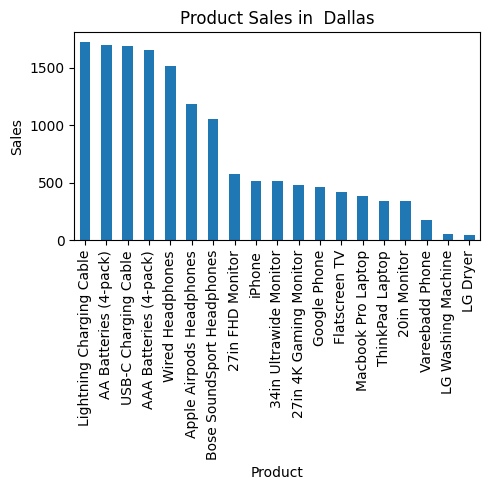

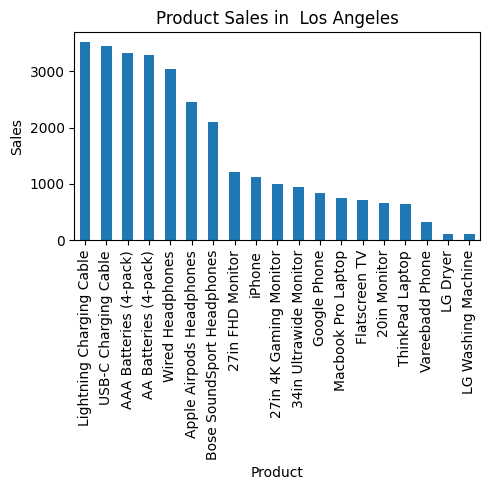

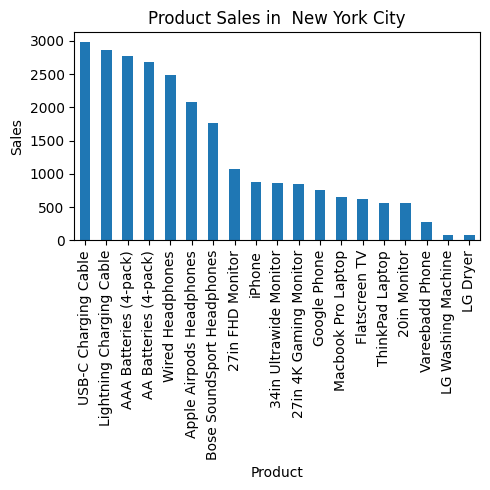

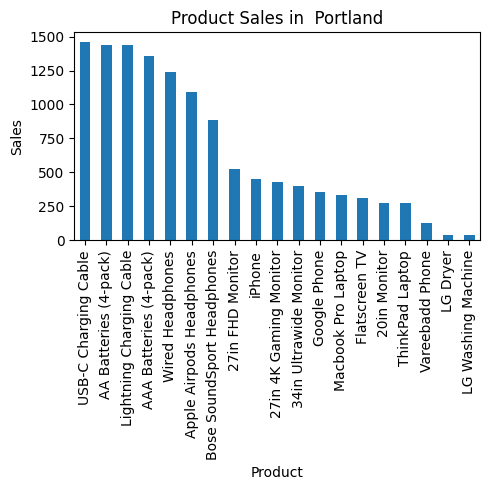

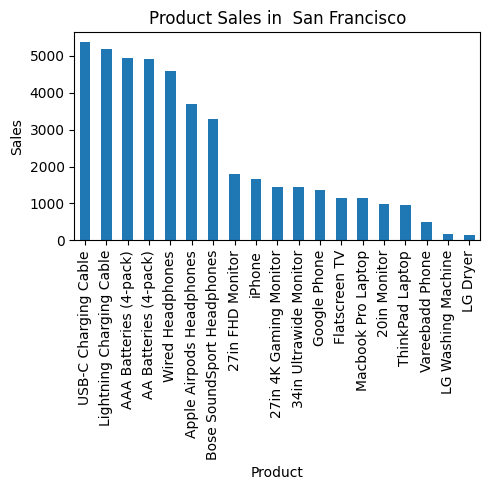

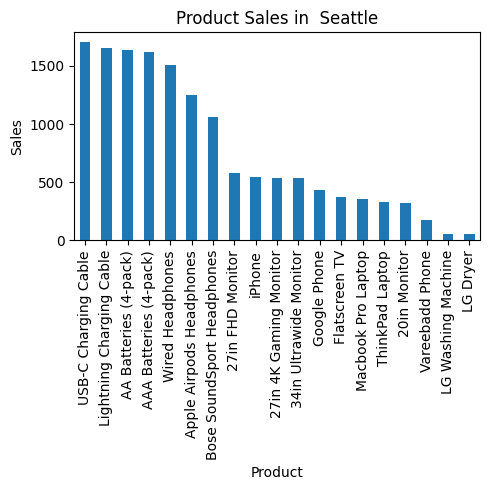

In [173]:
# Get the list of cities
cities = df_temp.index.get_level_values('city').unique()

# Create a separate plot for each city
for city in cities:
    plt.figure(figsize=(5,5))
    ax = df_temp[city].plot(kind='bar')
    ax.set_title(f'Product Sales in {city}')
    ax.set_xlabel('Product')
    ax.set_ylabel('Sales')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

What time should advertisements be made to maximize profits?

In [174]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Sep,8.97,Los Angeles
186846,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",Sep,700.00,San Francisco
186847,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",Sep,700.00,San Francisco
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",Sep,379.99,San Francisco


In [175]:
df['time'] = df['Order Date'].dt.strftime('%H')

In [176]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,time
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas,08
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston,22
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,09
...,...,...,...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Sep,8.97,Los Angeles,20
186846,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",Sep,700.00,San Francisco,16
186847,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",Sep,700.00,San Francisco,07
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",Sep,379.99,San Francisco,17


In [177]:
def label_hour(x):
    if 3 <= x < 6:
        return 'Early Morning (3:00-5:59)'
    elif 6 <= x < 12:
        return 'Morning (6:00 - 11:59)'
    elif 12 <= x < 16:
        return 'Afternoon (12:00 - 15:59)'
    elif  16 <= x < 18:
        return 'Late Afternoon (16:00 - 17:59)'
    elif 18 <= x < 21:
        return 'Evening (18:00 - 20:59)'
    else:  # 21 <= hour < 24
        return 'Night (21:00 - 2:59)'

df['time_of_day'] = df['time'].astype(int).apply(lambda x: label_hour(x))

In [178]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,time,time_of_day
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas,08,Morning (6:00 - 11:59)
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston,22,Night (21:00 - 2:59)
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14,Afternoon (12:00 - 15:59)
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14,Afternoon (12:00 - 15:59)
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,09,Morning (6:00 - 11:59)
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Sep,8.97,Los Angeles,20,Evening (18:00 - 20:59)
186846,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",Sep,700.00,San Francisco,16,Late Afternoon (16:00 - 17:59)
186847,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",Sep,700.00,San Francisco,07,Morning (6:00 - 11:59)
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",Sep,379.99,San Francisco,17,Late Afternoon (16:00 - 17:59)


In [179]:
sales_by_time = df.groupby('time_of_day')['Sales'].sum().sort_values(ascending=False)
sales_by_time

time_of_day
Afternoon (12:00 - 15:59)         8497433.47
Morning (6:00 - 11:59)            8269243.68
Evening (18:00 - 20:59)           6914003.08
Night (21:00 - 2:59)              6238294.10
Late Afternoon (16:00 - 17:59)    4033962.92
Early Morning (3:00-5:59)          539098.72
Name: Sales, dtype: float64

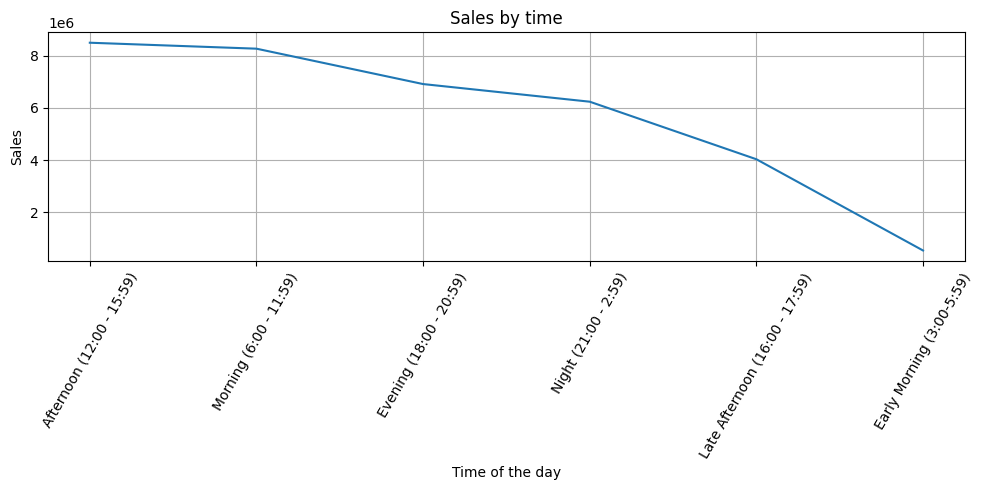

In [180]:
plt.subplots(figsize=(10,5))
plt.plot(sales_by_time.index, sales_by_time.values)
plt.xlabel('Time of the day')
plt.ylabel('Sales')
plt.title('Sales by time')
plt.xticks(rotation=60)
plt.grid()
plt.tight_layout()

plt.show()

Find the products that are frequently bought together

In [181]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,time,time_of_day
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas,08,Morning (6:00 - 11:59)
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston,22,Night (21:00 - 2:59)
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14,Afternoon (12:00 - 15:59)
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14,Afternoon (12:00 - 15:59)
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,09,Morning (6:00 - 11:59)
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Sep,8.97,Los Angeles,20,Evening (18:00 - 20:59)
186846,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",Sep,700.00,San Francisco,16,Late Afternoon (16:00 - 17:59)
186847,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",Sep,700.00,San Francisco,07,Morning (6:00 - 11:59)
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",Sep,379.99,San Francisco,17,Late Afternoon (16:00 - 17:59)


In [182]:
df_duplicates = df[df['Order ID'].duplicated(keep=False)]
df_duplicates.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,time,time_of_day
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14,Afternoon (12:00 - 15:59)
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14,Afternoon (12:00 - 15:59)
18,176574.0,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,19,Evening (18:00 - 20:59)
19,176574.0,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Apr,11.95,Los Angeles,19,Evening (18:00 - 20:59)
30,176585.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",Apr,99.99,Boston,11,Morning (6:00 - 11:59)
31,176585.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",Apr,99.99,Boston,11,Morning (6:00 - 11:59)
32,176586.0,AAA Batteries (4-pack),2.0,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",Apr,5.98,San Francisco,17,Late Afternoon (16:00 - 17:59)
33,176586.0,Google Phone,1.0,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",Apr,600.00,San Francisco,17,Late Afternoon (16:00 - 17:59)
119,176672.0,Lightning Charging Cable,1.0,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",Apr,14.95,New York City,11,Morning (6:00 - 11:59)
120,176672.0,USB-C Charging Cable,1.0,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",Apr,11.95,New York City,11,Morning (6:00 - 11:59)


In [183]:
df_duplicates['Grouped']=df_duplicates.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

C:\Users\sweek\AppData\Local\Temp\ipykernel_7600\2566783851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duplicates['Grouped']=df_duplicates.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


In [184]:
df_duplicates

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,time,time_of_day,Grouped
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14,Afternoon (12:00 - 15:59),"Google Phone, Wired Headphones"
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14,Afternoon (12:00 - 15:59),"Google Phone, Wired Headphones"
18,176574.0,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,19,Evening (18:00 - 20:59),"Google Phone, USB-C Charging Cable"
19,176574.0,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Apr,11.95,Los Angeles,19,Evening (18:00 - 20:59),"Google Phone, USB-C Charging Cable"
30,176585.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",Apr,99.99,Boston,11,Morning (6:00 - 11:59),"Bose SoundSport Headphones, Bose SoundSport He..."
...,...,...,...,...,...,...,...,...,...,...,...,...
186792,259303.0,AA Batteries (4-pack),1.0,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",Sep,3.84,Atlanta,20,Evening (18:00 - 20:59),"34in Ultrawide Monitor, AA Batteries (4-pack)"
186803,259314.0,Wired Headphones,1.0,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",Sep,11.99,Atlanta,00,Night (21:00 - 2:59),"Wired Headphones, AAA Batteries (4-pack)"
186804,259314.0,AAA Batteries (4-pack),2.0,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",Sep,5.98,Atlanta,00,Night (21:00 - 2:59),"Wired Headphones, AAA Batteries (4-pack)"
186841,259350.0,Google Phone,1.0,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",Sep,600.00,San Francisco,13,Afternoon (12:00 - 15:59),"Google Phone, USB-C Charging Cable"


In [195]:
grouped_products = df_duplicates['Grouped'].value_counts().head(10)
grouped_products

Grouped
iPhone, Lightning Charging Cable                        1764
Google Phone, USB-C Charging Cable                      1712
iPhone, Wired Headphones                                 722
Vareebadd Phone, USB-C Charging Cable                    624
Google Phone, Wired Headphones                           606
iPhone, Apple Airpods Headphones                         572
Google Phone, Bose SoundSport Headphones                 322
Google Phone, USB-C Charging Cable, Wired Headphones     231
Vareebadd Phone, Wired Headphones                        208
iPhone, Lightning Charging Cable, Wired Headphones       168
Name: count, dtype: int64

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

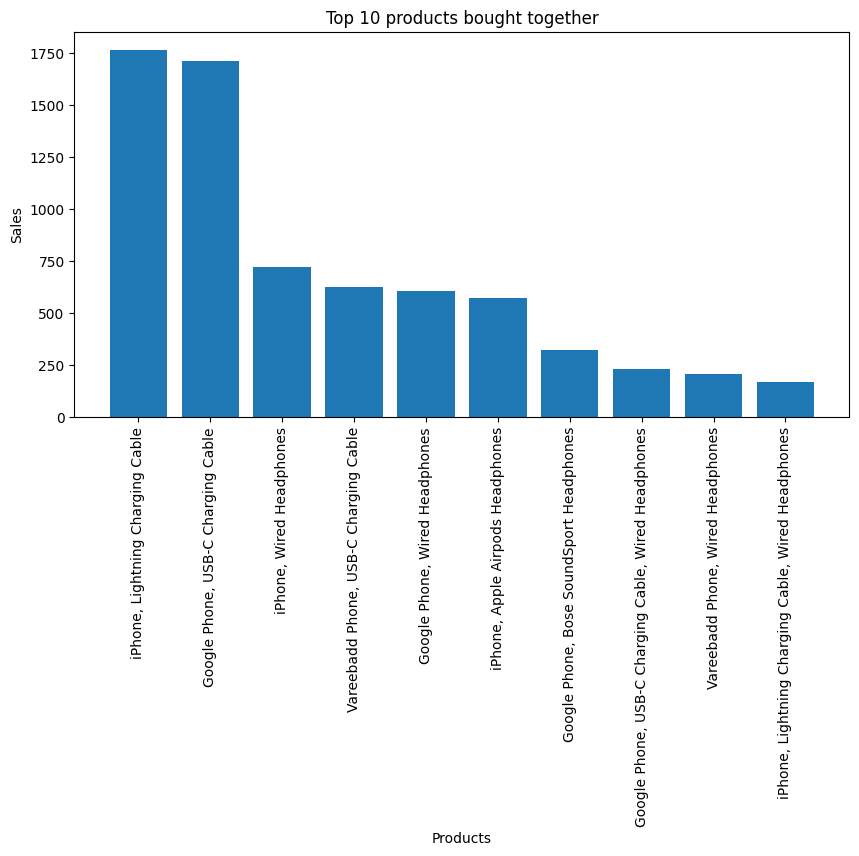

In [192]:
plt.subplots(figsize=(10,5))
plt.bar(grouped_products.index, grouped_products.values)
plt.xlabel('Products')
plt.ylabel('Sales')
plt.title('Top 10 products bought together')
plt.xticks(rotation=90)

plt.plot